In [1]:
import os,glob
import pandas as pd
import pygmt
import pickle
import warnings  
warnings.filterwarnings("ignore")

In [2]:
pygmt.config(FONT_ANNOT_PRIMARY = '10p,Times-Roman',
            FONT_LABEL = '14p,Times-Roman',
            MAP_LABEL_OFFSET = '4p',
            MAP_TICK_LENGTH_PRIMARY = '5p',
            PROJ_LENGTH_UNIT = 'c',
            MAP_ANNOT_OFFSET_PRIMARY = '5p',
            MAP_ANNOT_OFFSET_SECONDARY = '5p',
            MAP_FRAME_TYPE = 'fancy',
            MAP_FRAME_WIDTH = 'auto',
            FORMAT_GEO_MAP = 'D',
            PS_CHAR_ENCODING = 'Standard+',
            MAP_FRAME_PEN = '2p,black')

In [108]:
region = [0, 80, 10, 65]
STAlist = ['GUDG','TBLG','KIV','GNI','ZARN','VAND']
PKLpath = '/Volumes/home/Research/STEP/01_Split'
# STAlist=['GUDG']



GUDG -88.51


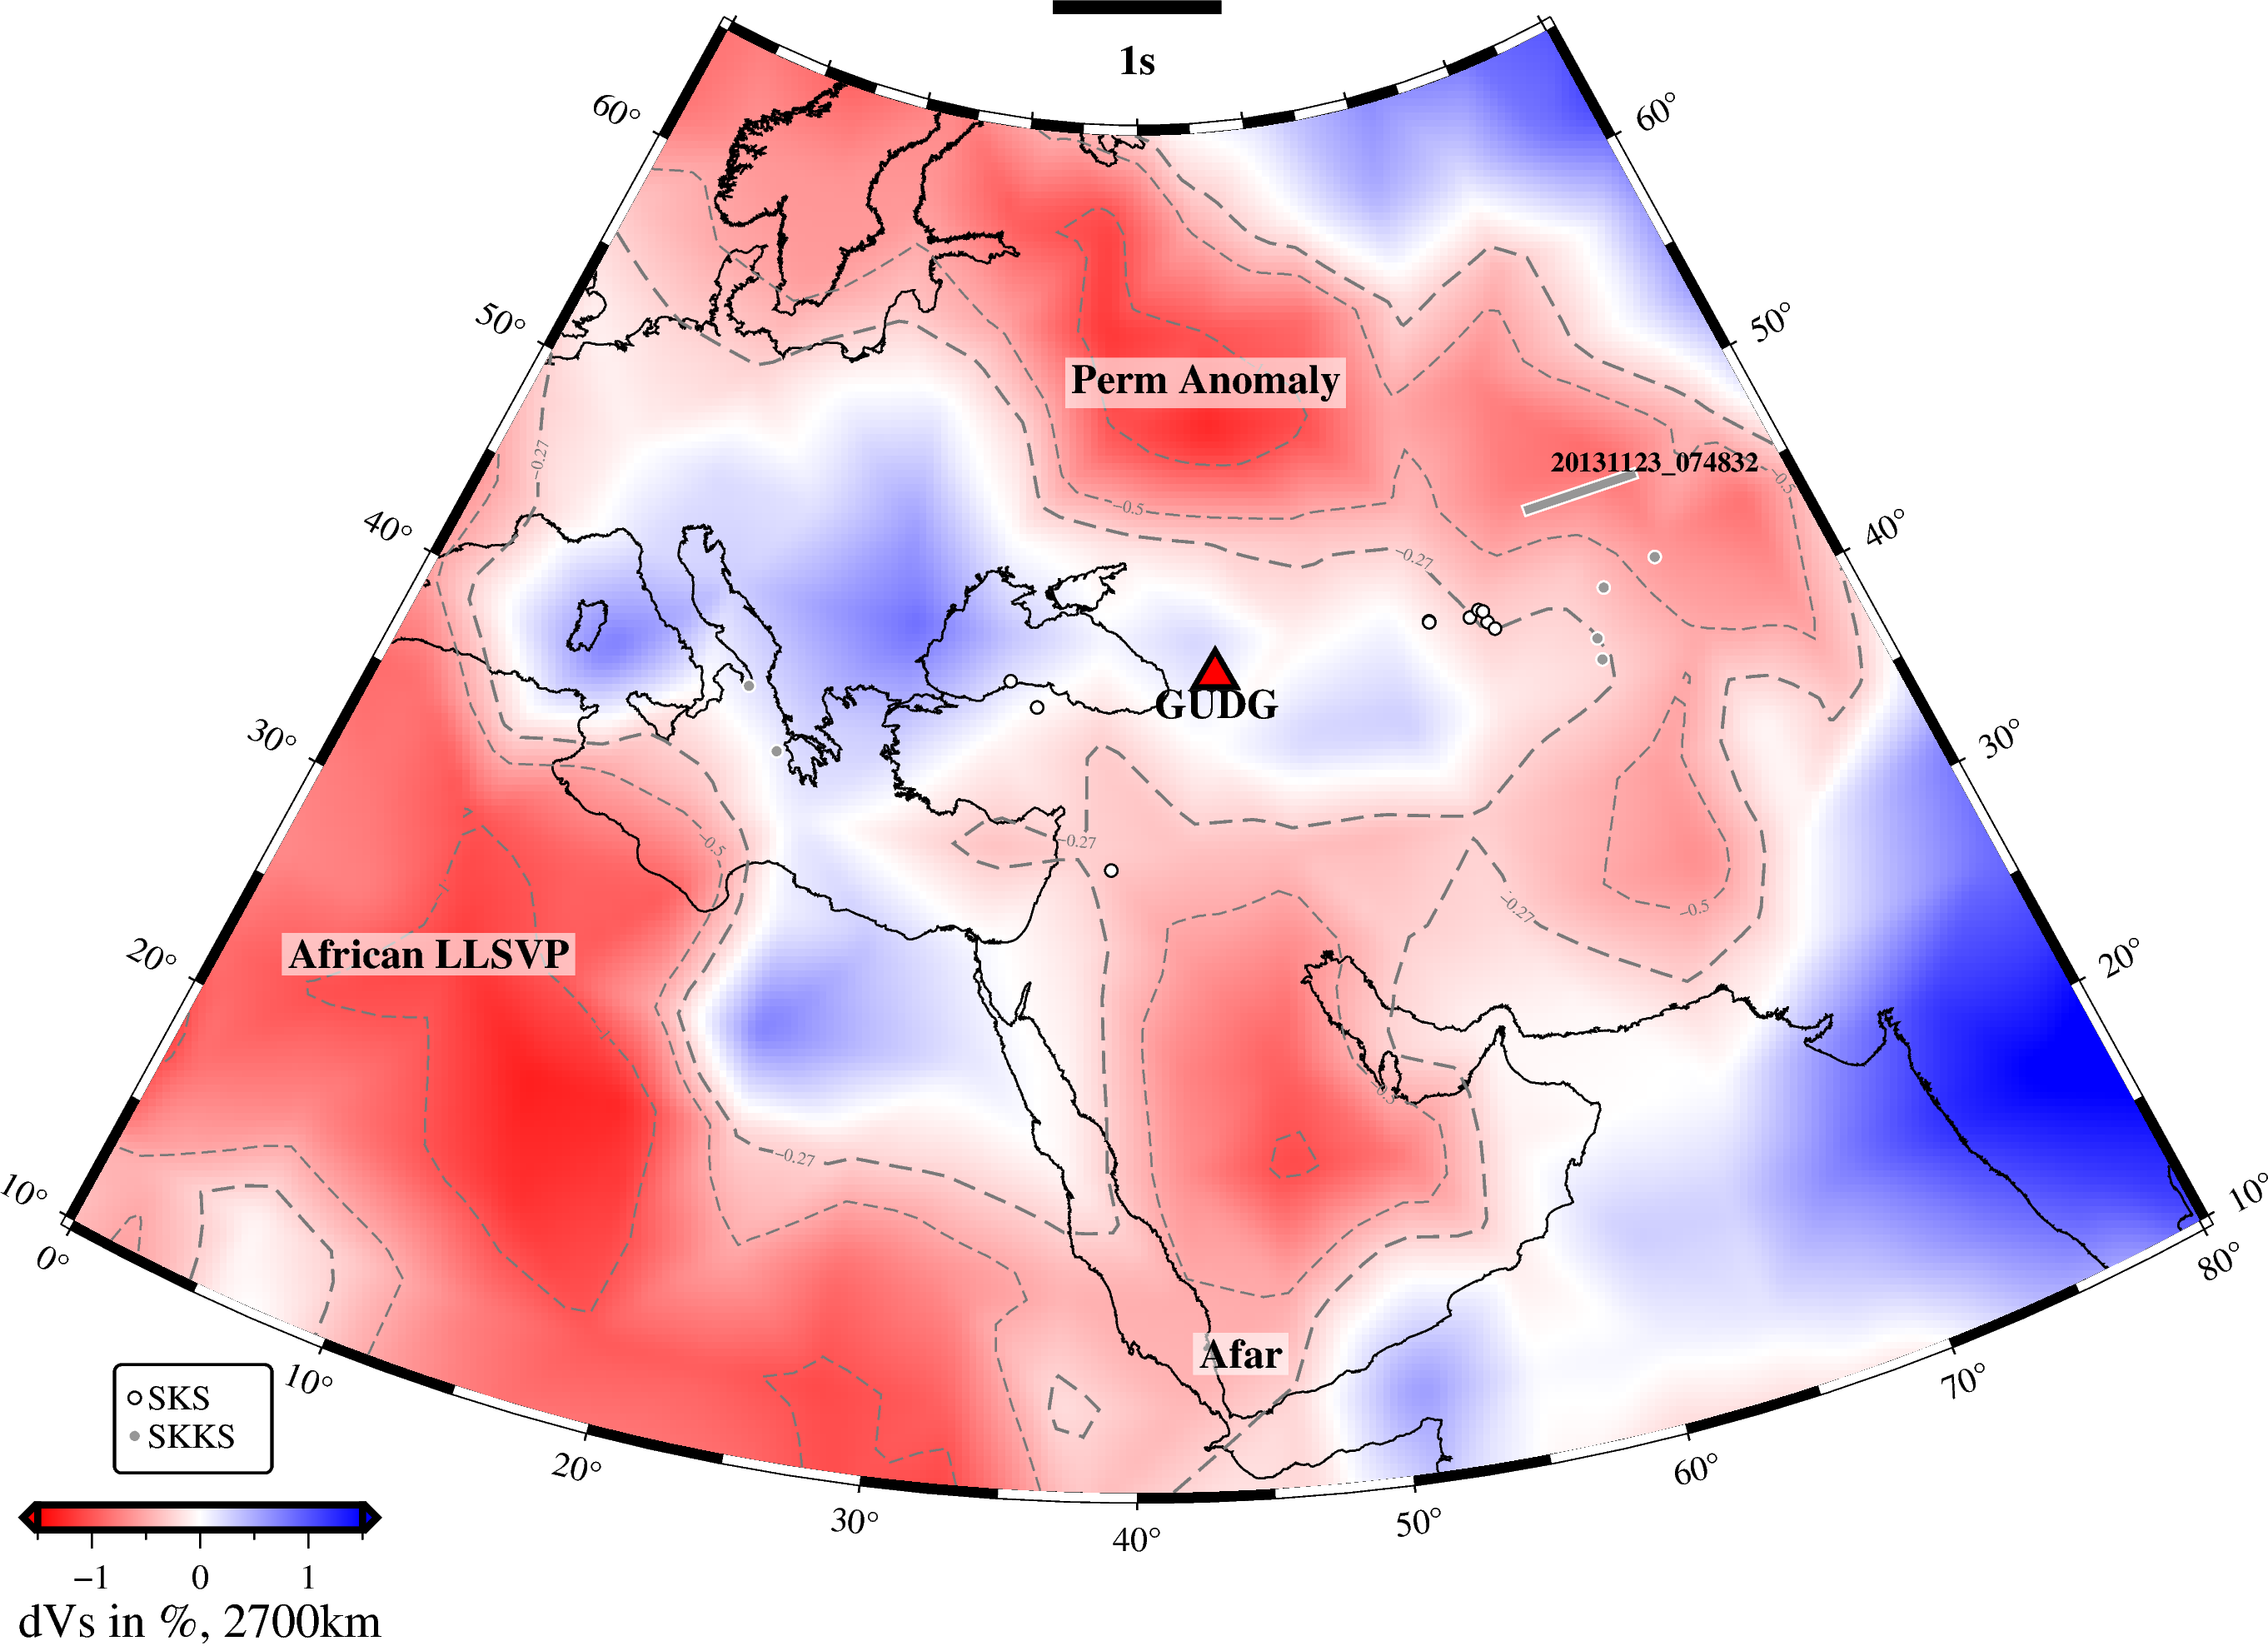

TBLG -81.42


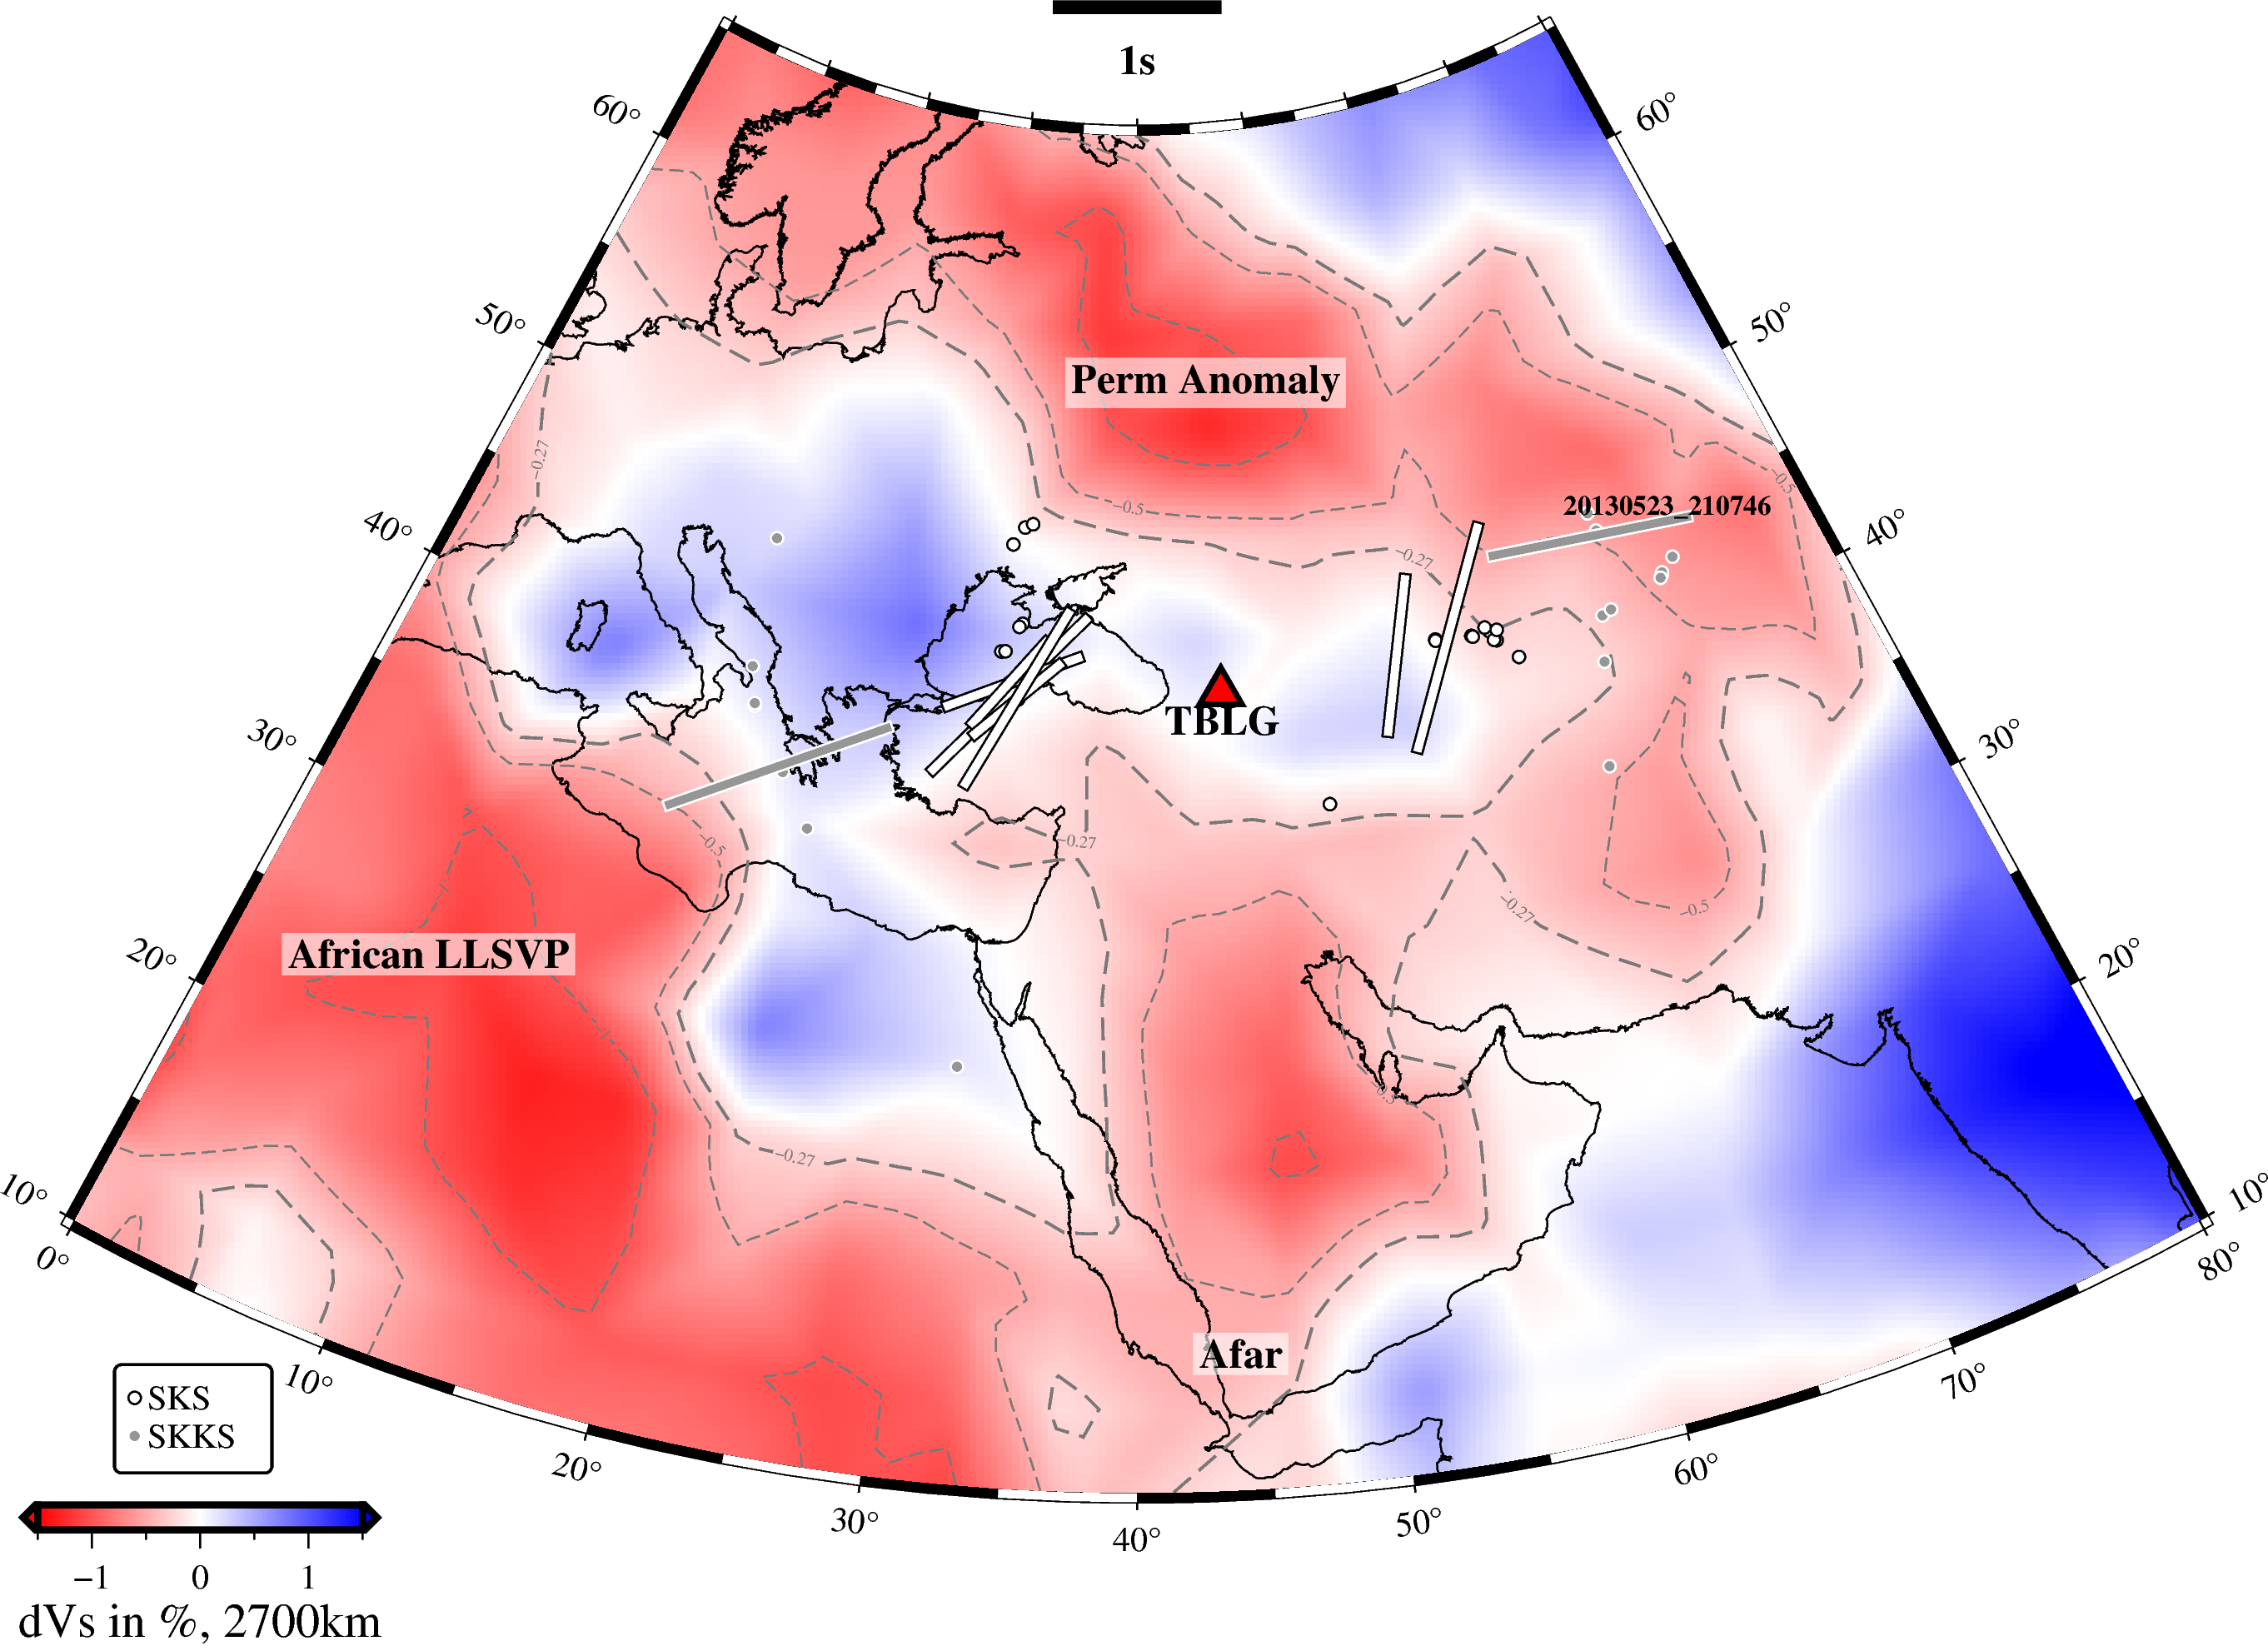

KIV -34.62
KIV -51.43
KIV -44.2
KIV -47.05
KIV SKS -56.04
KIV SKS -68.66


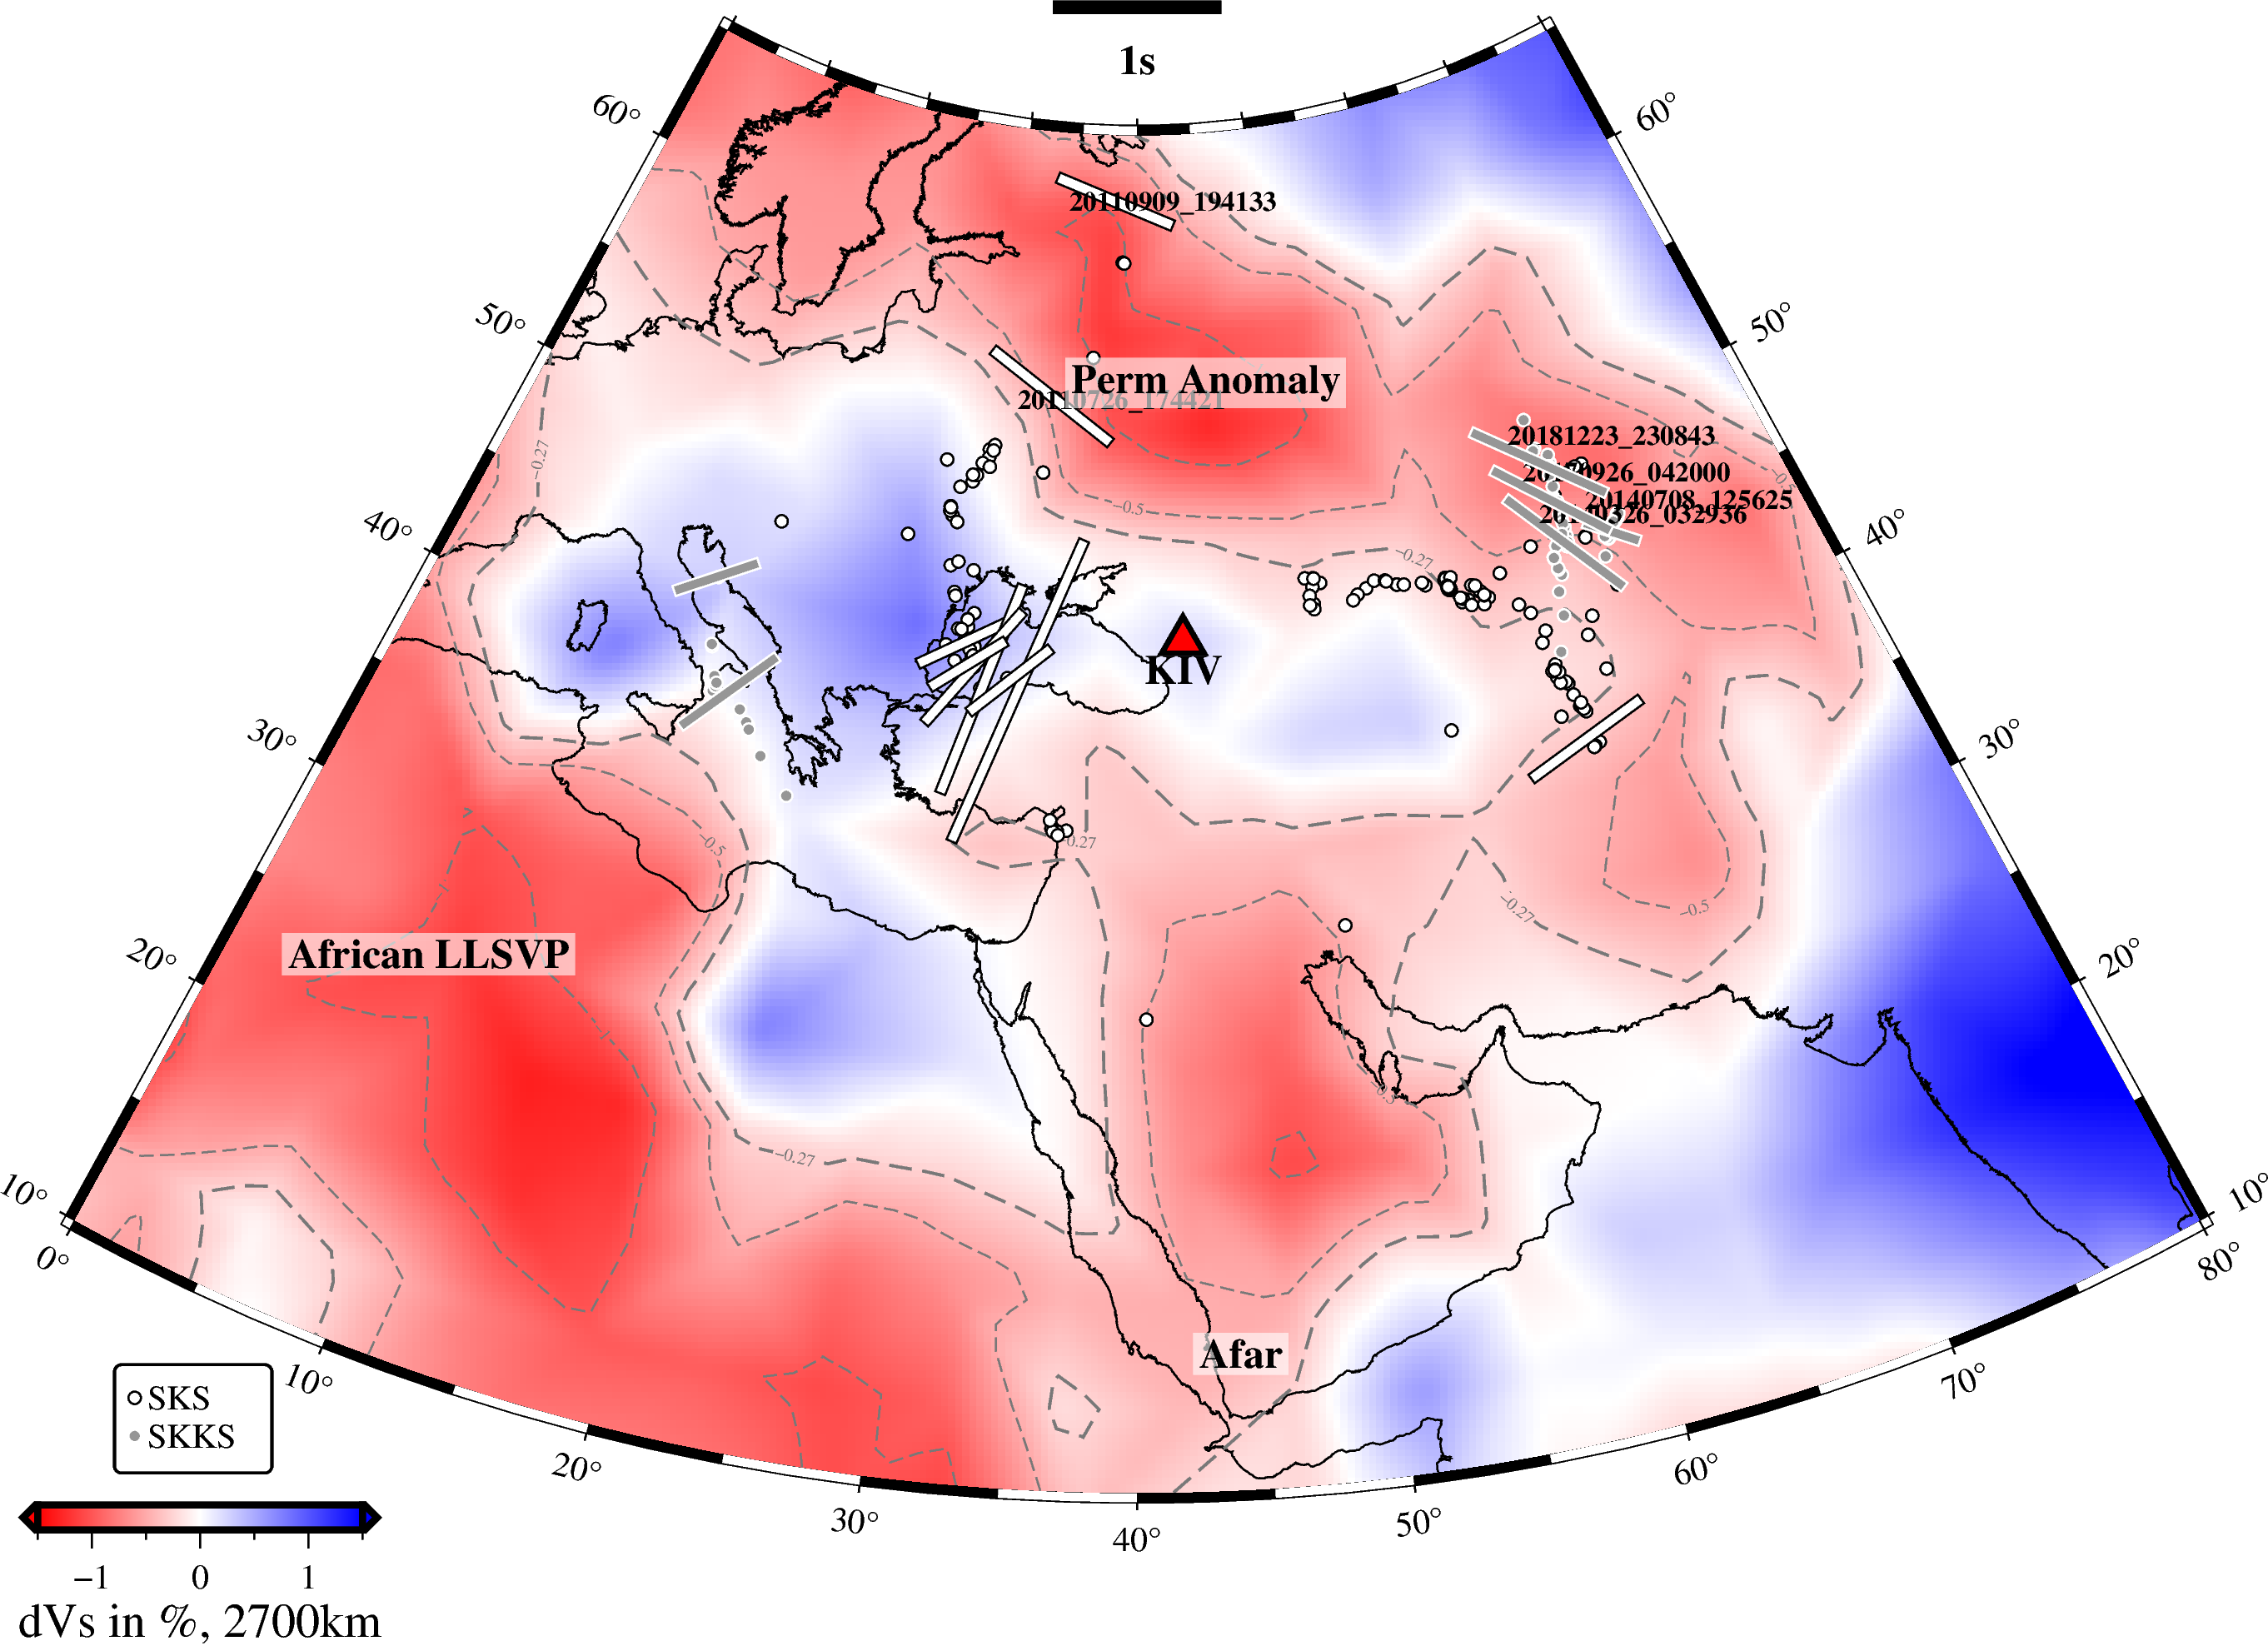

GNI -81.85
GNI SKS -67.13
GNI SKS -54.63
GNI SKS -45.14


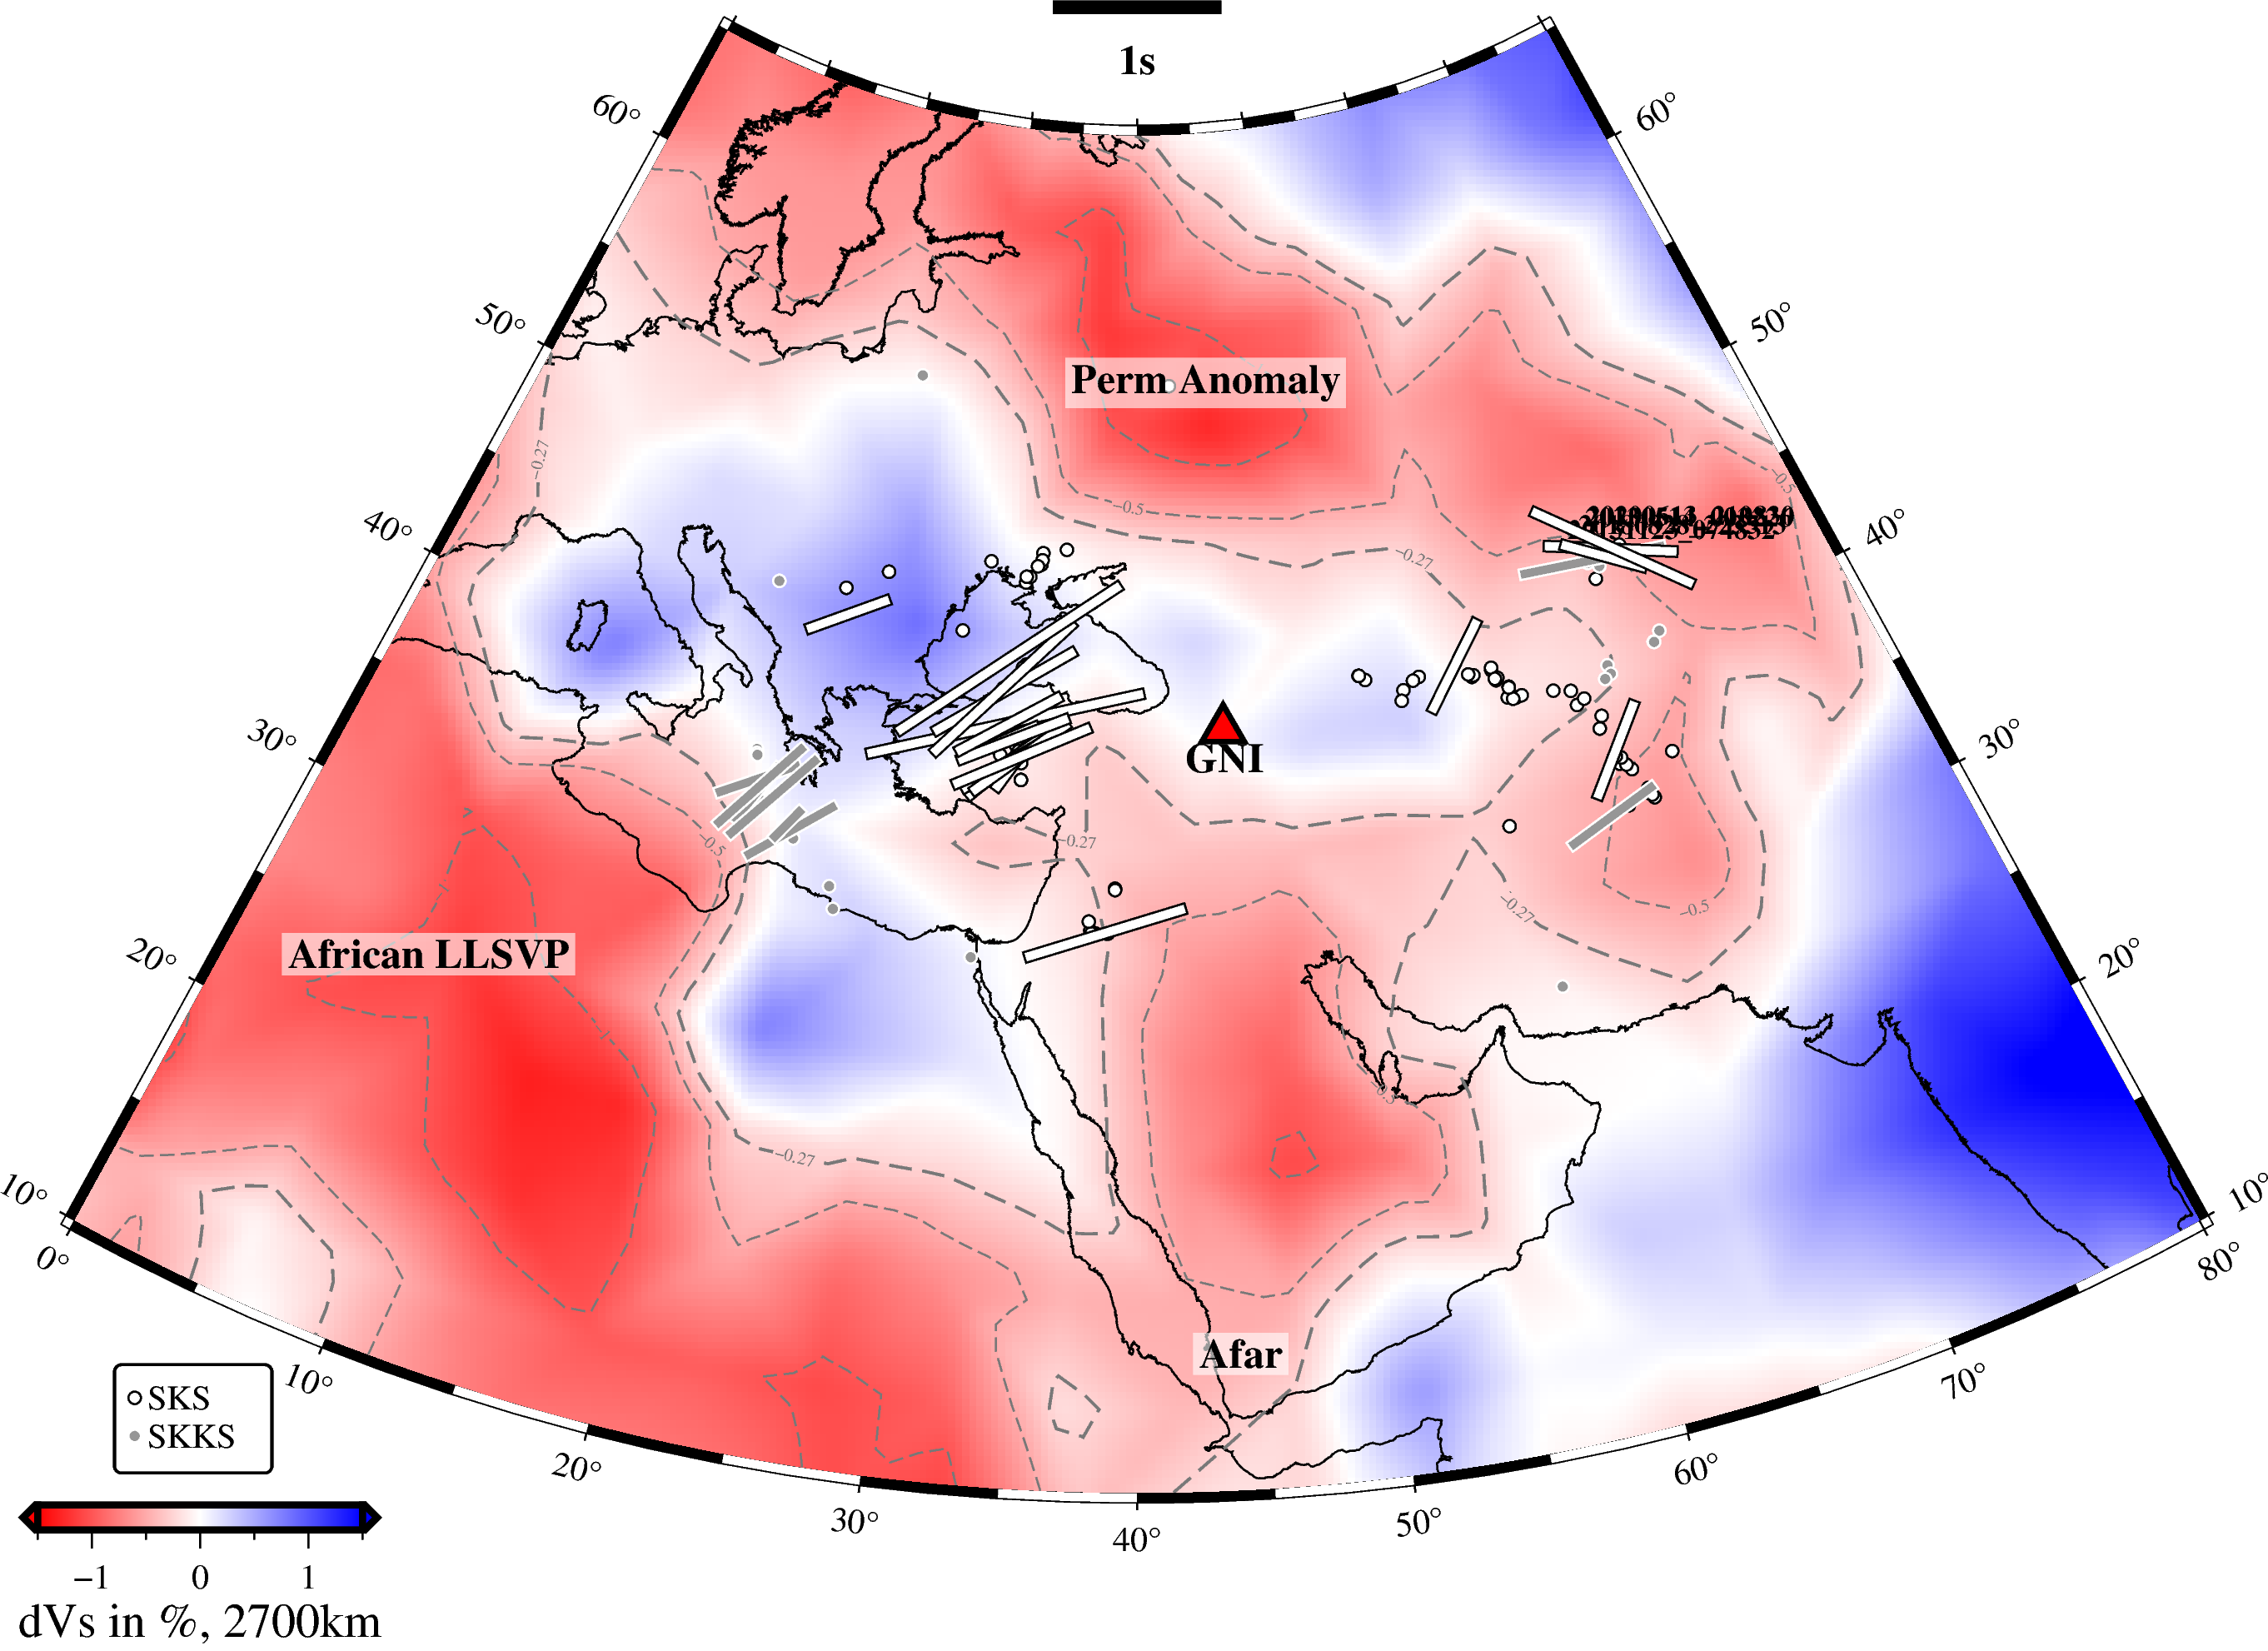

ZARN SKS -63.0


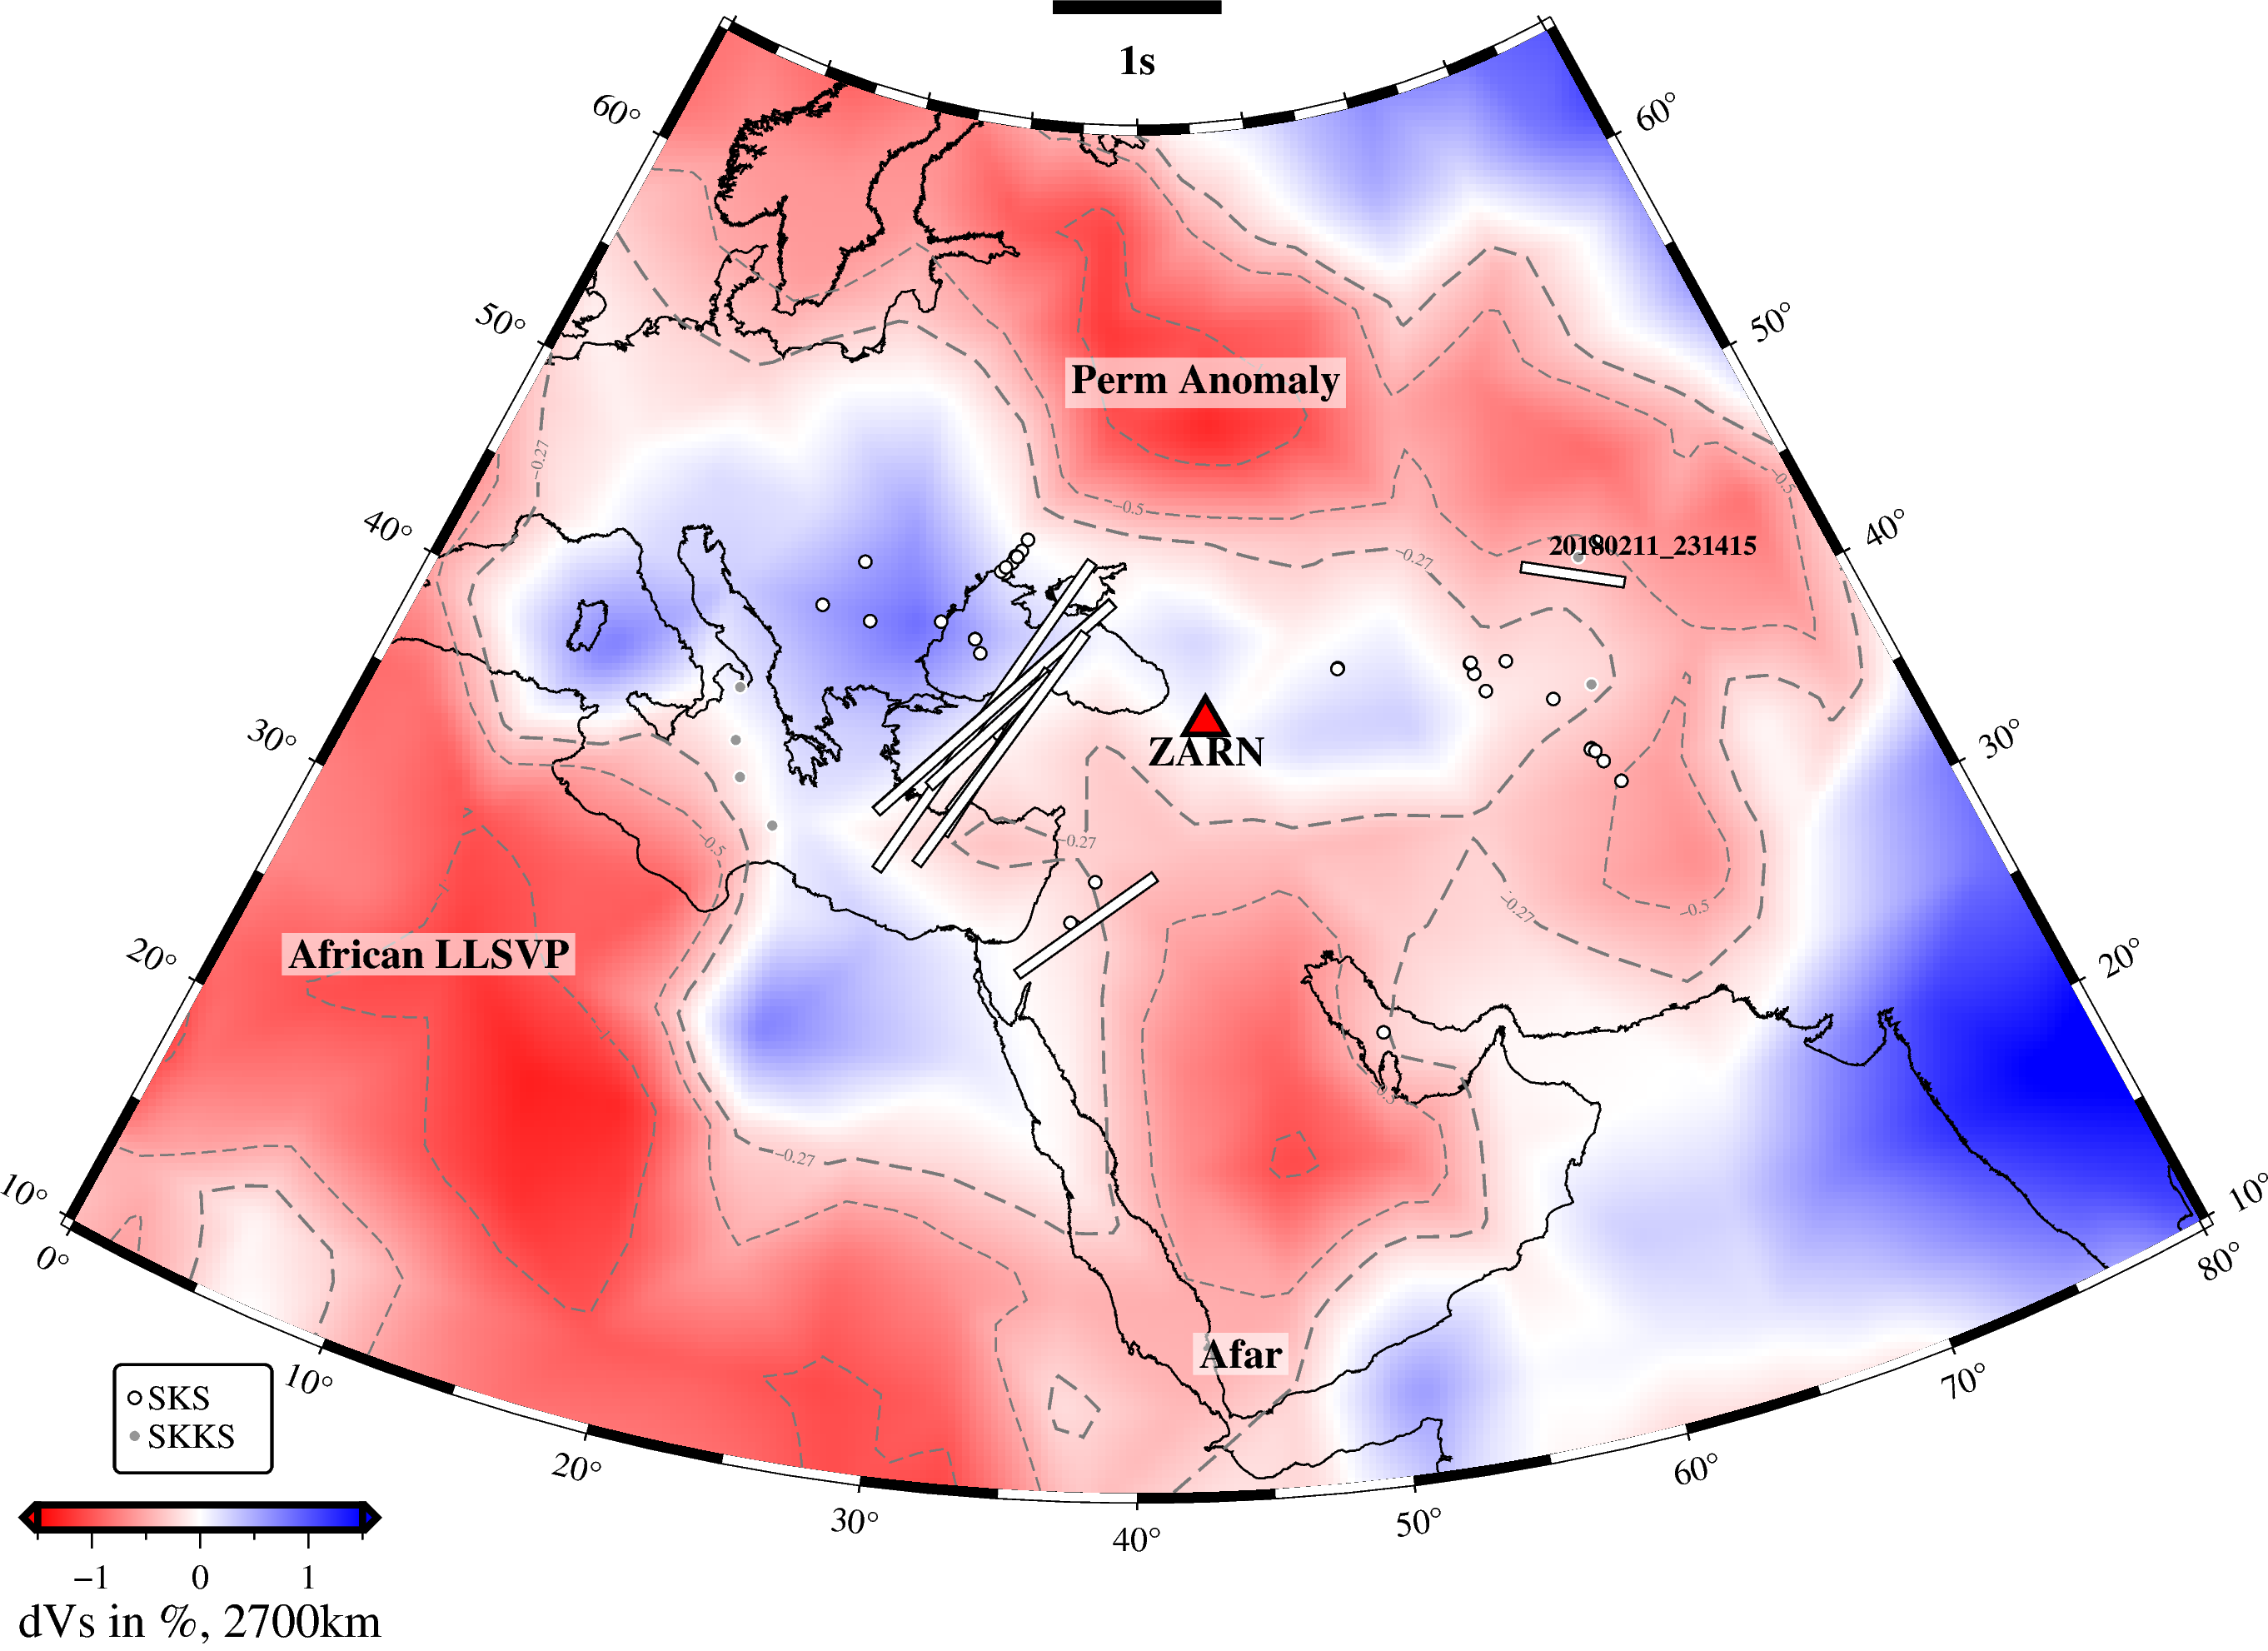

VAND -49.81
VAND -35.0
VAND SKS -48.68
VAND SKS -54.74


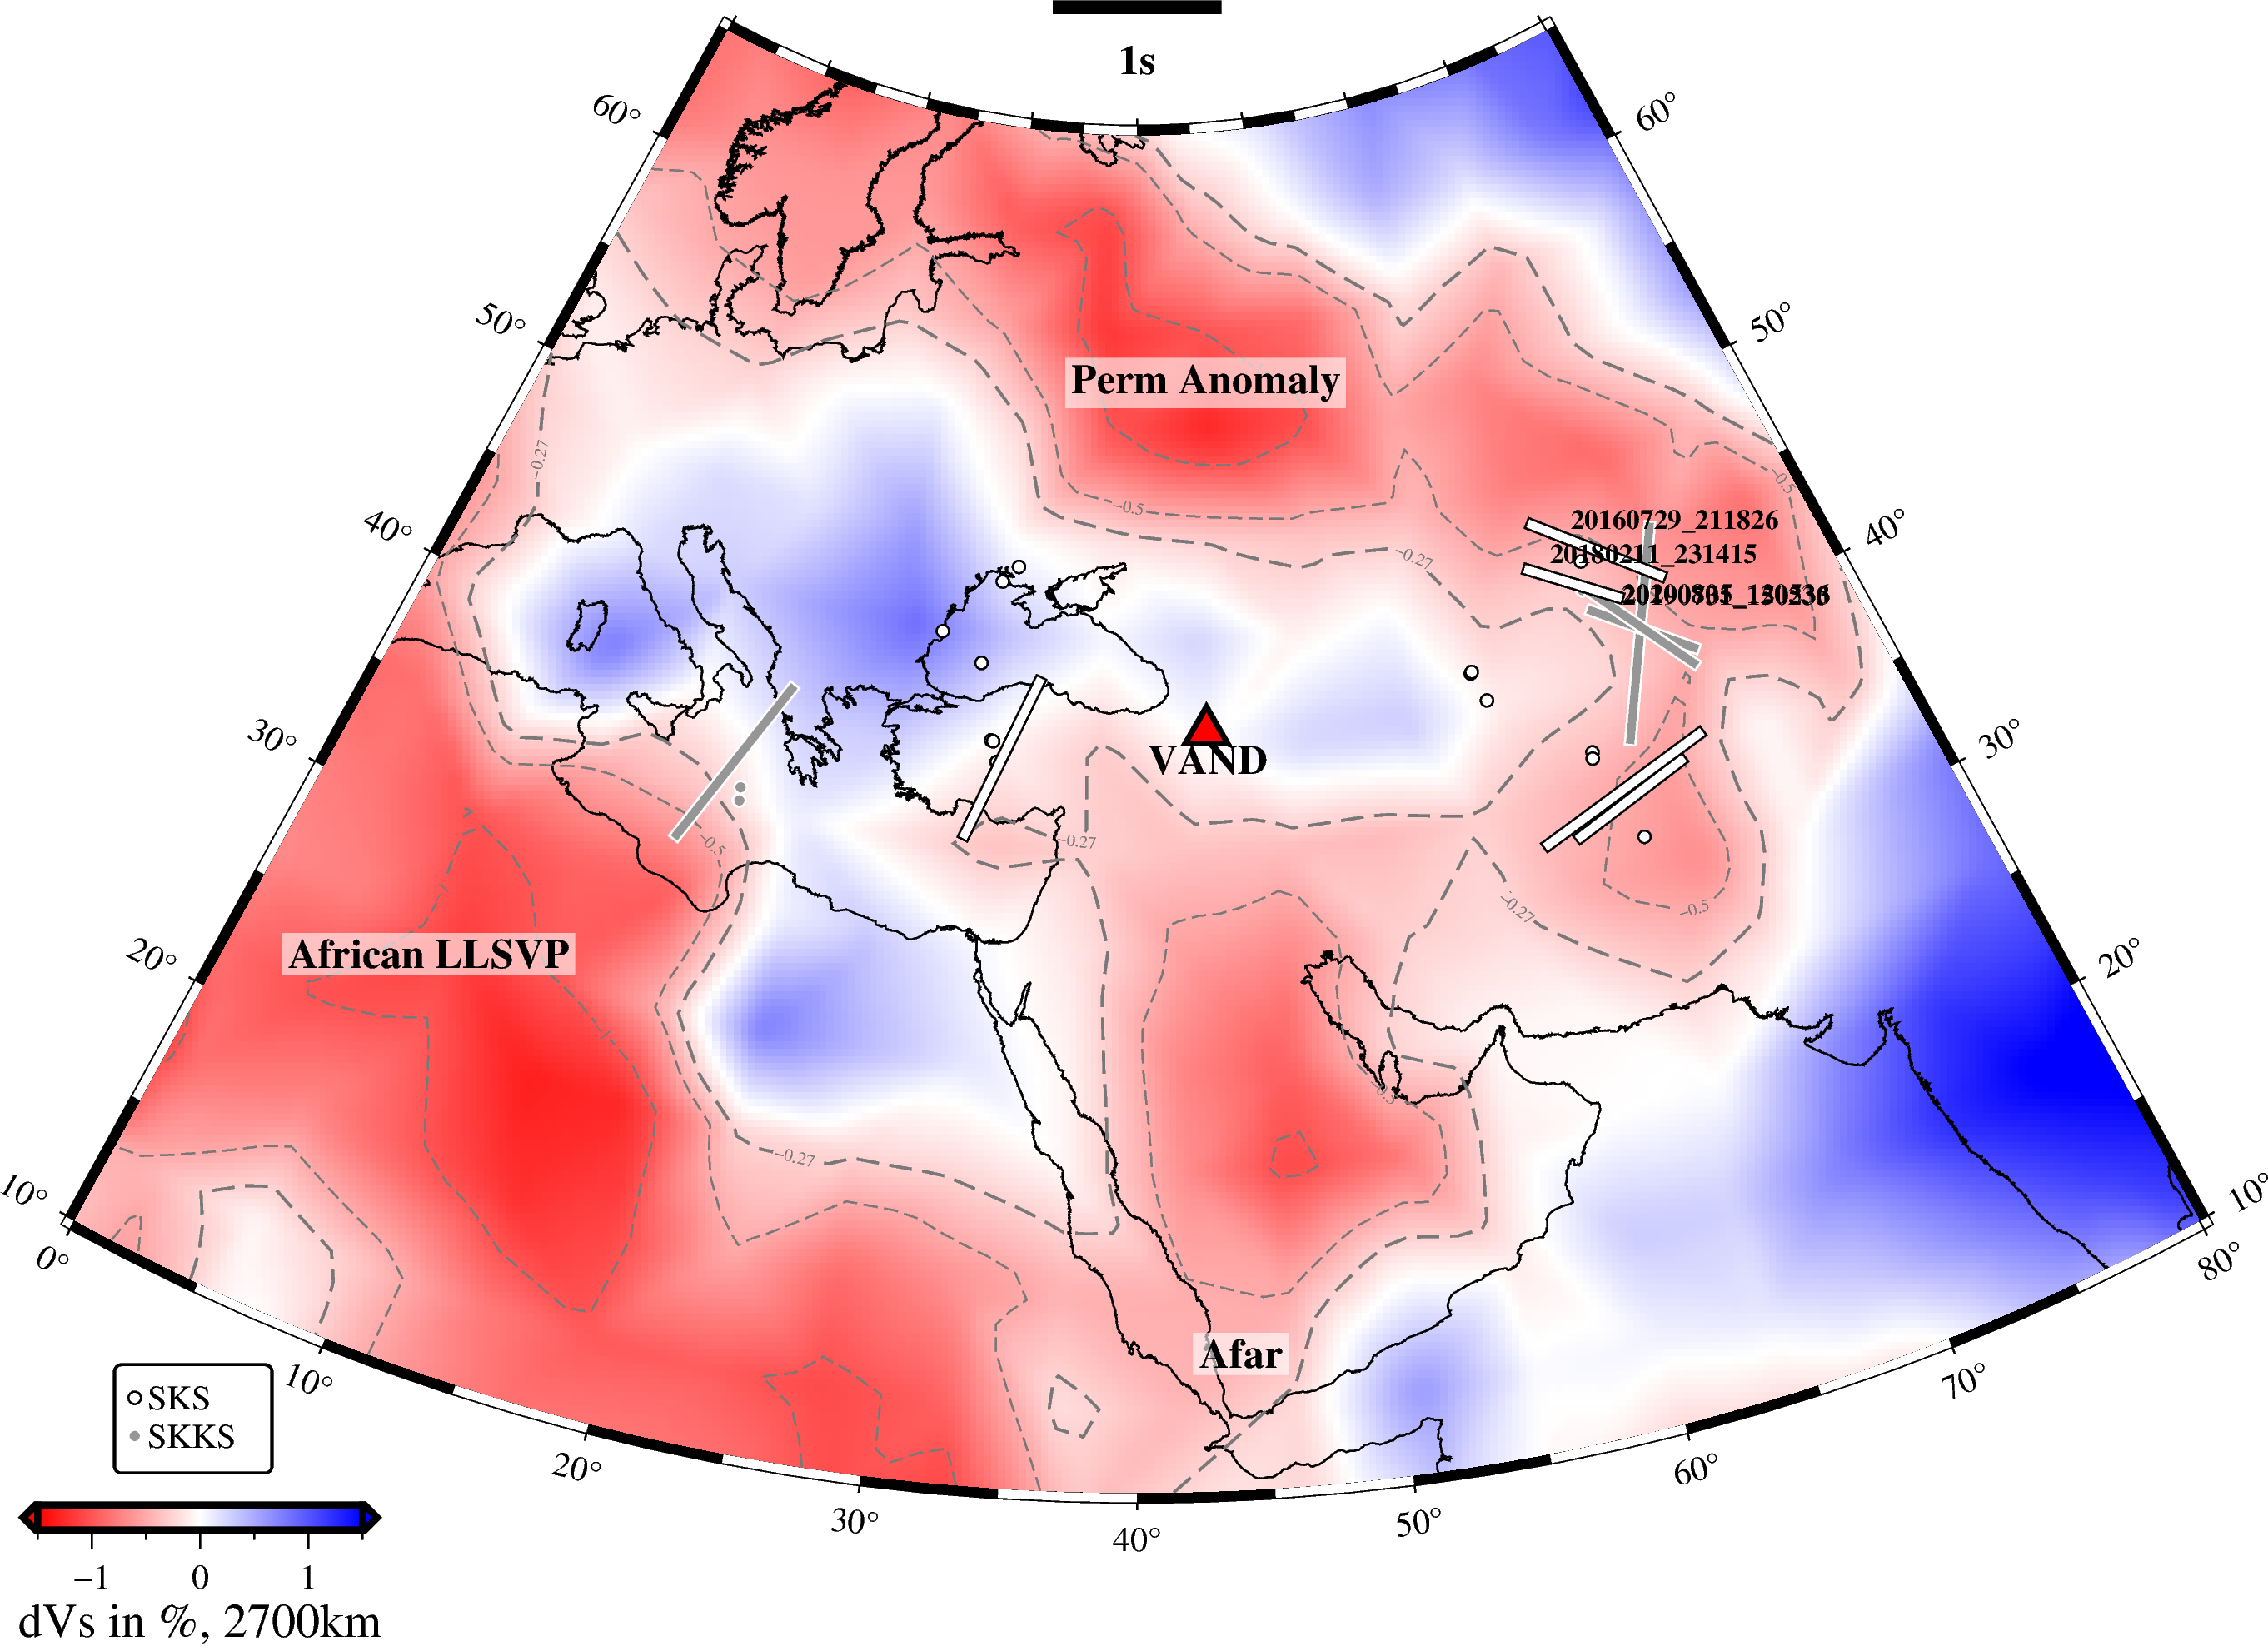

In [110]:
for STA in STAlist:
    pkl = glob.glob(f'{PKLpath}/*{STA}.pkl')[0]
    STApkl = pickle.load(open(pkl, "rb"))
    values = [value for keys, value in STApkl.items() ][0]
    sta = values['station']
    stlat = values['latitude']; stlon = values['longitude']
    
    df = pd.read_csv(glob.glob(f'*{STA}_PiercePoint_v2.csv')[0])

    fig = pygmt.Figure()
    fig.basemap(region=region, projection="L40/40/0/80/8.5i", frame = ['x10f5', 'y10f5', f'nSEW'])

    fig.grdimage(grid='dvs_at_2700km.grd', cmap='cmap_gypsum.cpt',dpi=35)
    fig.colorbar(cmap='cmap_gypsum.cpt', position='x-0.15i/-0.15i+w1.3i/0.1i+h+e', frame='xa1f0.5+l"dVs in %, 2700km" ')

    fig.coast(resolution='h', shorelines ='1/0.5p,black',area_thresh=10000)
    fig.grdcontour(grid='dvs_at_2700km.grd',interval=0.5,pen='0.5p,120,-',annotation='0.5+f5p',limit=[-1.2,-0.4])
    fig.grdcontour(grid='dvs_at_2700km.grd',interval=0.27,pen='0.8p,120,-',annotation='0.27+f5p',limit=[-0.5,-0.1])
    fig.plot(x=stlon, y=stlat, style="t0.5c", color='red', pen="1.5p,black")
    fig.text(x=stlon, y=stlat-1.2,text=STA,font='12p,5')
    df_ = df[df['phase']=='SKS'][df['null']==True]
    fig.plot(x=df_['p_lon'], y = df_['p_lat'],style='c0.05i',pen='0.5p,black', color='white',label='SKS')
    df_ = df[df['phase']=='SKKS'][df['null']==True]
    fig.plot(x=df_['p_lon'], y = df_['p_lat'],style='c0.05i',pen='0.5p,white', color='150',label='SKKS')

    dff_ = df[df['phase']=='SKKS'][df['null']==False]
    for i in range(len(dff_)):
        p_lon = dff_['p_lon'].values[i]
        p_lat = dff_['p_lat'].values[i]
        phi   = float(dff_['phiSC'].values[i])
        dt    = dff_['dtSC'].values[i]
        event = dff_['Event'].values[i]
        if phi >0:
            data = [[p_lon, p_lat, phi-90, 50, dt*700]]
            fig.plot(data=data, style="J", color='150', pen="0.5p,white")
        elif phi <0:
            print(STA,phi)
            data = [[p_lon, p_lat, phi-90, 50, dt*700]]
            fig.plot(data=data, style="J", color='150', pen="0.5p,white")
            fig.text(x=p_lon+5,y=p_lat,text=event,font='8p,5')
    dff_ = df[df['phase']=='SKS'][df['null']==False]
    for j in range(len(dff_)):
        p_lon = dff_['p_lon'].values[j]
        p_lat = dff_['p_lat'].values[j]
        phi   = float(dff_['phiSC'].values[j])
        dt    = dff_['dtSC'].values[j]
        event = dff_['Event'].values[j]
        if phi >0:
            data = [[p_lon, p_lat, phi-90, 50, dt*700]]
            fig.plot(data=data, style="J", color='white', pen="0.5p,black")
        elif phi <0:
            print(STA,'SKS',phi)
            data = [[p_lon, p_lat, phi-90, 50, dt*700]]
            fig.plot(data=data, style="J", color='white', pen="0.5p,black")
            fig.text(x=p_lon+5,y=p_lat,text=event,font='8p,5')
    fig.text(x=45,y=55,text='Perm Anomaly', font='12p,5',fill='white@40')
    fig.text(x=8,y=25,text='African LLSVP', font='12p,5',fill='white@40')
    fig.text(x=44,y=15,text='Afar', font='12p,5',fill='white@40')
    data = [[40, 70, 90-90, 50, 700]]
    fig.plot(data=data, style="J", color='black', pen="0.5p,black", no_clip=True)
    fig.text(x=40,y=68,text='1s', font='12p,5',fill='white@40', no_clip=True)

    fig.legend(position='x0.4/0.2/1.6c/1.1c/BL',box='+r2p+pblack+gwhite+p0.8p')
    fig.show()

    fig.savefig(f'version2/TomoD_PiercePoint_{STA}_v4.png',dpi=300)
    fig.savefig(f'version2/TomoD_PiercePoint_{STA}_v4.pdf',dpi=300)

In [100]:
-88.51+90

1.4899999999999949